In [10]:
import pandas as pd
from minisom import MiniSom
from pylab import pcolor, colorbar, plot
from sklearn.preprocessing import MinMaxScaler

# Mapa Auto Organozável

In [11]:
# Importando bade de dados
base = pd.read_csv('wines.csv')

# Definindo variáveis X
X = base.iloc[:,1:14].values
y = base.iloc[:,0].values

In [12]:
# Normalizando valores de X
normalizador = MinMaxScaler(feature_range = (0,1))
X = normalizador.fit_transform(X)

In [13]:
# Montando mapa
som = MiniSom(x = 8, y = 8, input_len = 13, sigma = 1.0, learning_rate = 0.5, random_seed = 2)

# Inicializando os pesos
som.random_weights_init(X)

# Treinamento
som.train_random(data = X, num_iteration = 100)

In [14]:
# Pesos
som._weights

# Valores do mapa
som._activation_map

# Matriz com os BMU
q = som.activation_response(X)

In [15]:
y[y == 1] = 0
y[y == 2] = 1
y[y == 3] = 2

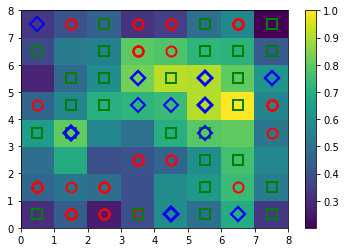

In [16]:
# MID - mean inter neuron distance
pcolor(som.distance_map().T)
colorbar()

w = som.winner(X[2])
markers = ['o', 's', 'D']
color = ['r', 'g', 'b']

for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5, w[1] + 0.5, markers[y[i]],
        markerfacecolor = 'None', markersize = 10,
        markeredgecolor = color[y[i]], markeredgewidth = 2)